![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)


# **Color Spaces**

In this lesson we'll learn to:
1. View the individual channels of an RGB Image
2. Manipulate a color space
3. Introduce HSV Color Spaces

In [3]:
# Making root folder as working directory
import os
from pathlib import Path
os.chdir("D:\\Learning\\udemy_computer_vision_course")

# checking current workig dirtectory path
print(os.getcwd())

ROOT = Path(".")

IMAGES = ROOT.joinpath("data", "images")

D:\Learning\udemy_computer_vision_course


In [9]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 5):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
# !wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
# !unzip -qq images.zip

In [6]:
# Load our input image
image_path = str(IMAGES.joinpath("castara.jpeg"))
image = cv2.imread(image_path)

# Use cv2.split to get each color space separately
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(1280, 960)
(1280, 960)
(1280, 960)


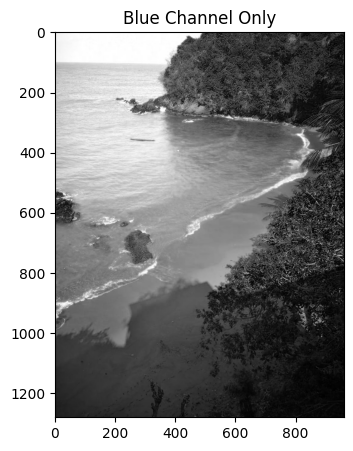

In [10]:
# Each color space on it's on will look like a grayscale as it lacks the other color channels
imshow("Blue Channel Only", B)

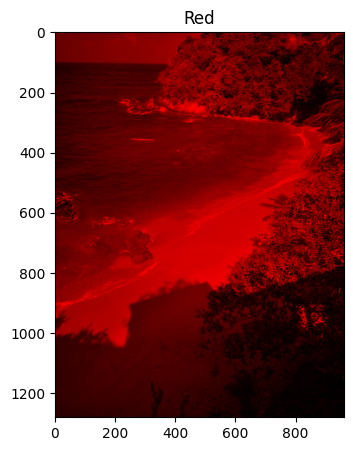

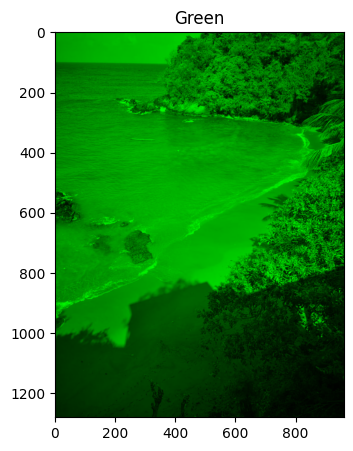

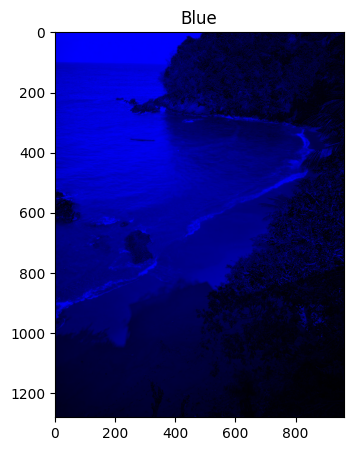

In [11]:
import numpy as np

# Let's create a matrix of zeros 
# with dimensions of the image h x w  
zeros = np.zeros(image.shape[:2], dtype = "uint8")

imshow("Red", cv2.merge([zeros, zeros, R]))
imshow("Green", cv2.merge([zeros, G, zeros]))
imshow("Blue", cv2.merge([B, zeros, zeros]))

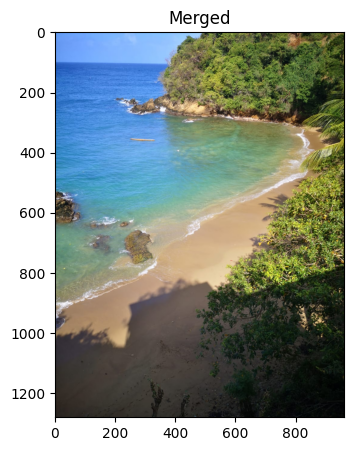

In [13]:
image = cv2.imread(image_path)

# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)

# Let's re-make the original image, 
merged = cv2.merge([B, G, R]) 
imshow("Merged", merged) 

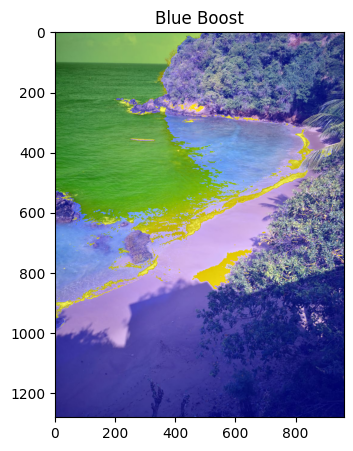

In [14]:
# Let's amplify the blue color
merged = cv2.merge([B+100, G, R])
imshow("Blue Boost", merged)

## **The HSV Color Space**

![](https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png)

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

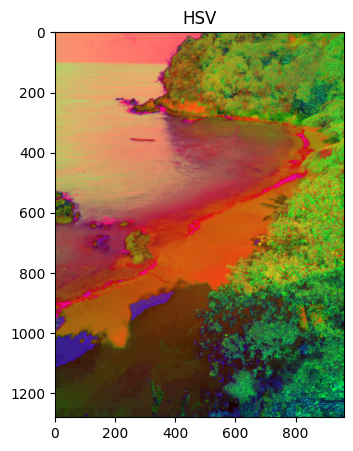

In [15]:
# Reload our image
image = cv2.imread(image_path)

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imshow('HSV', hsv_image)

#### This looks odd....why? 

Because our plotting function was designed for RGB only images, not HSV

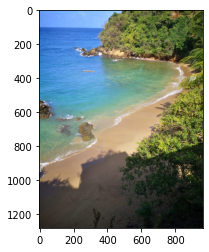

In [ ]:
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.show()

### **Let's view each channel type in the HSV Color Space representation**

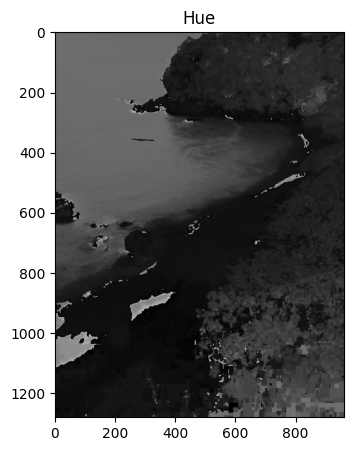

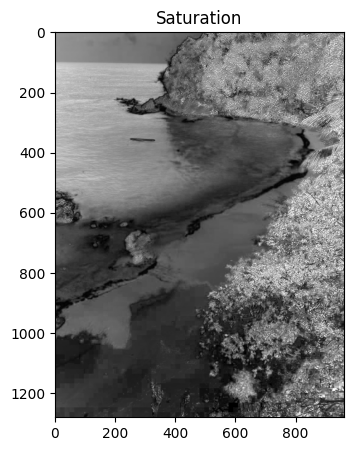

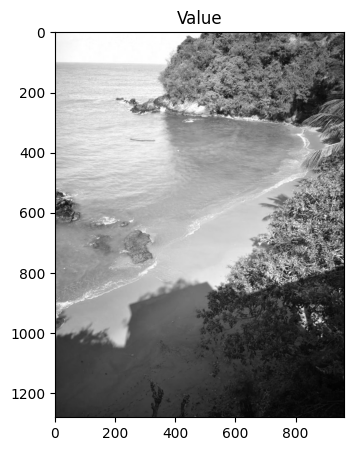

In [16]:
# Switching back to viewing the RGB representation
imshow("Hue", hsv_image[:, :, 0])
imshow("Saturation", hsv_image[:, :, 1])
imshow("Value", hsv_image[:, :, 2])